## 1.) Gathering Data
## 2.) Preparing Data

In [1]:
# Import needed libraries such as data processing, data visualization and Algorithms
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
#Gathering and importing data
data_test_df = pd.read_csv("data_test.csv")
data_train_df = pd.read_csv("data_train.csv")

In [3]:
#Data Analysis
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### The data training set has 891 examples and 11 features and our taget variable would be the "Survived"

In [5]:
data_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### We can see that 38% out of the training-set survived the Titanic

In [6]:
data_train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Base on the table above, we need to convert a lot of features into numeric later

In [7]:
#Find the missing data
total = data_train_df.isnull().sum().sort_values(ascending=False)
percent_1 = data_train_df.isnull().sum()/data_train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [8]:
data_train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### As we can see, there are 11 features and the target variable is "survived"

C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


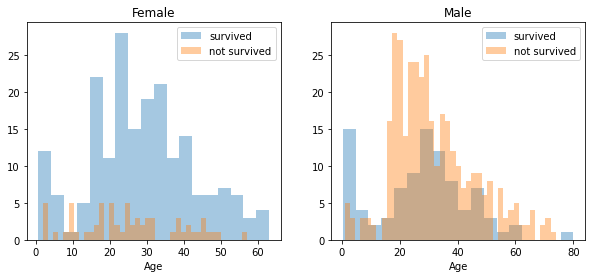

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data_train_df[data_train_df['Sex']=='female']
men = data_train_df[data_train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### The result shows that men have a high probability of survival when they are age between 18 and 30 years old

C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


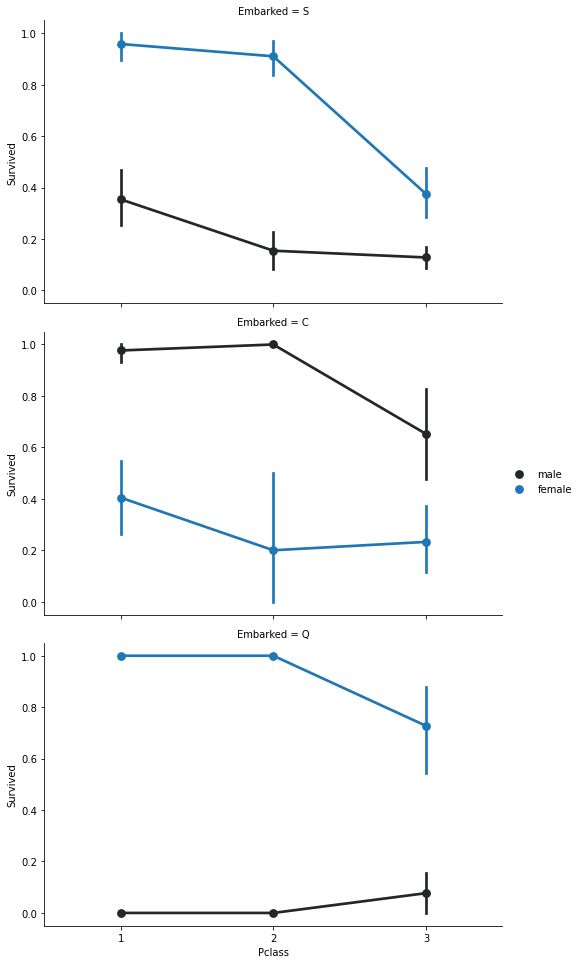

In [10]:
FacetGrid = sns.FacetGrid(data_train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Embarked seems to be correlated with survival, depending on the gender.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

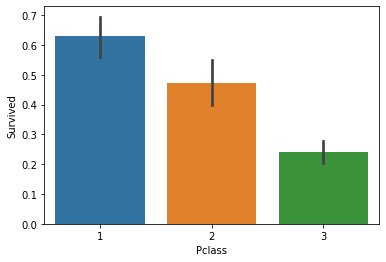

In [11]:
#Plotting the Passenger Class
sns.barplot(x='Pclass', y='Survived', data=data_train_df)

### Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


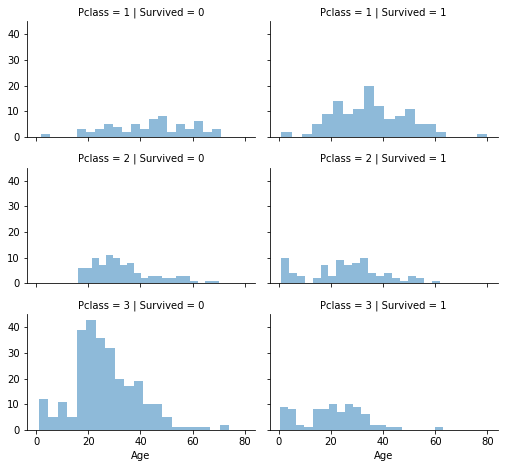

In [12]:
grid = sns.FacetGrid(data_train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### This plot confirms our assumption about the passenger class 1

In [13]:
#This will show the total number of relatives a person on the titanic have
data = [data_train_df, data_test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
data_train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


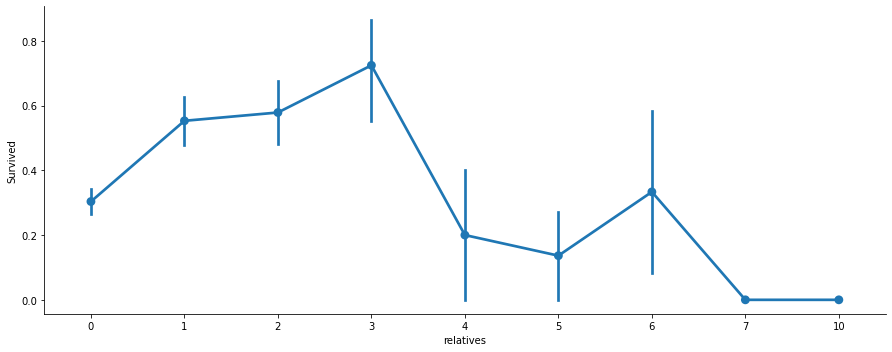

In [14]:
axes = sns.factorplot('relatives','Survived', 
                      data=data_train_df, aspect = 2.5, )

### Here we can see that you had a high probabilty of survival with 1 to 3 realitves, 

### but a lower one if you had less than 1 or more than 3

In [15]:

data_train_df = data_train_df.drop(['PassengerId'], axis=1)

In [16]:
#Dealing with Cabin (687), Embarked (2) and Age (177)
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [data_train_df, data_test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
data_train_df = data_train_df.drop(['Cabin'], axis=1)
data_test_df = data_test_df.drop(['Cabin'], axis=1)

In [17]:
#Tackling the issue with the age features missing values
data = [data_train_df, data_test_df]

for dataset in data:
    mean = data_train_df["Age"].mean()
    std = data_test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

#Computing random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
#Filling NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data_train_df["Age"].astype(int)
data_train_df["Age"].isnull().sum()

0

In [18]:
#We will just fill in the two missing values for the Embarked feature, since there are only two of them.
data_train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [data_train_df, data_test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
#Converting Features
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


### Base from the result, "Fare" is a float, and we must deal with Name, Sex, Ticket, and Embarked

In [21]:
#Using "astype()" changing "Fare" from float to int64
data = [data_train_df, data_test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
#In order to create a new feature, we will use the Name feature to extract the Titles from the Name.
data = [data_train_df, data_test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:

#Extracting the titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#Replacing the titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
#Converting the titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
#Filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
data_train_df = data_train_df.drop(['Name'], axis=1)
data_test_df = data_test_df.drop(['Name'], axis=1)

In [23]:
#Converting 'Sex' features into numeric
genders = {"male": 0, "female": 1}
data = [data_train_df, data_test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
data_train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

### It will be challenging to organize the 681 distinct tickets in the Ticket property into usable categories. We'll thus remove it from the dataset.

In [25]:
data_train_df = data_train_df.drop(['Ticket'], axis=1)
data_test_df = data_test_df.drop(['Ticket'], axis=1)

In [26]:
#Converting ‘Embarked’ feature into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [data_train_df, data_test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [27]:
#Here we will now create a categories within the features
#Converting 'age' feature by converting it from float to integer

data = [data_train_df, data_test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [28]:
data_train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,3,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [29]:
data = [data_train_df, data_test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

### Two additional features that I computed from existing features will be added to the dataset.

In [30]:
#Adding the Age Times Class and Fare per Person
data = [data_train_df, data_test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [31]:
#Before we begin training the models, let's take one more look at the training set.
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
data_train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


## 3.) Building Machine Learning Models

## 4.) Training

In [32]:
#Building Machine Learning Models
#Now we will train several Machine Learning models and compare their results.
X_train = data_train_df.drop("Survived", axis=1)
Y_train = data_train_df["Survived"]
X_test  = data_test_df.drop("PassengerId", axis=1).copy()

In [33]:
#Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

#Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

#Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

#Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\charl\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.59,Random Forest
92.59,Decision Tree
86.64,KNN
81.93,Stochastic Gradient Decent
81.59,Logistic Regression
81.48,Support Vector Machines
79.46,Perceptron
77.89,Naive Bayes


## 5.) Evaluation

### As we can see, the Random Forest classifier goes on the first place and Decision Tree Classifier on the second place. But first we need to test how the Random Forest Classifier and Decision Tree Classifier performs.

## 6.) Hyperparameter Tuning 
## 7.) Prediction

In [35]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("The accuracy for Random Forest Classifier:",round(acc_random_forest,2,), "%")

The accuracy for Random Forest Classifier: 92.59 %


In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_prediction = decision_tree.predict(X_test)

decision_tree.score(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("The accuracy for Decision Tree Classifier:",round(acc_decision_tree,2,), "%")

The accuracy for Decision Tree Classifier: 92.59 %


In [37]:
#This will serve as the K-Fold Cross Validation on the Random Forest Model and Decision Tree Classifier, using 5 folds (K=5)
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=200, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8  1.   0.6  0.8  0.8  0.6  0.4  0.8  0.8  0.6  1.   0.8  0.6  1.
 1.   0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.6  0.8  0.8  0.8  0.8
 1.   0.8  0.6  0.8  0.8  1.   0.8  0.8  0.6  0.8  0.8  0.4  0.8  0.6
 0.8  0.6  1.   0.6  0.8  0.8  1.   1.   0.6  0.8  1.   0.8  0.6  1.
 1.   0.8  0.8  0.8  1.   0.8  0.6  0.6  1.   0.6  1.   1.   1.   0.8
 1.   1.   1.   0.8  0.8  1.   0.8  1.   0.8  1.   0.8  1.   0.8  0.6
 0.6  0.8  0.8  1.   0.8  0.8  0.8  0.5  1.   1.   1.   1.   1.   0.75
 1.   1.   1.   0.75 0.75 0.5  0.75 1.   0.75 1.   1.   0.5  0.75 1.
 1.   1.   1.   1.   1.   0.75 1.   0.75 0.75 1.   0.75 0.75 0.5  0.75
 1.   1.   1.   1.   0.75 0.75 0.75 0.75 0.75 1.   0.75 0.75 0.5  1.
 1.   0.75 1.   0.75 0.75 1.   0.75 0.75 0.5  1.   1.   0.5  0.5  0.75
 1.   1.   0.75 1.   0.5  0.5  0.5  0.5  0.5  1.   0.75 1.   1.   1.
 0.75 1.   0.75 0.75 0.5  0.5  1.   1.   1.   0.5  1.   1.   1.   0.75
 0.75 1.   0.75 1.   0.75 0.75 0.75 0.75 0.75 1.   0.75 0.75 1.   1.
 1.   1.   1. 

In [38]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, Y_train, cv=200, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8  1.   1.   0.8  0.6  0.6  0.4  0.6  0.8  0.6  1.   0.8  0.6  1.
 1.   0.6  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.4  0.8  0.8  0.8  0.8
 1.   0.8  0.4  0.8  0.8  0.8  0.8  0.6  0.8  0.8  0.6  0.4  0.8  0.6
 0.6  0.8  1.   0.6  0.8  0.8  1.   0.8  0.6  0.8  1.   0.6  0.6  0.8
 1.   0.8  0.8  0.6  1.   0.8  0.6  0.6  1.   0.6  1.   1.   1.   0.8
 1.   0.8  1.   0.8  0.8  1.   0.6  1.   0.8  1.   0.8  1.   1.   0.6
 0.6  0.8  0.8  1.   0.8  0.6  0.8  0.5  0.75 1.   1.   1.   0.75 0.75
 1.   1.   1.   0.75 0.75 0.75 0.75 0.75 0.75 1.   1.   0.5  0.5  1.
 1.   1.   1.   1.   1.   0.75 1.   0.75 0.75 1.   0.75 0.75 0.5  0.75
 0.75 1.   1.   1.   0.75 0.75 0.75 0.75 0.75 1.   0.75 0.75 0.5  0.75
 1.   0.75 1.   0.75 0.75 1.   0.75 0.75 0.5  1.   1.   0.5  0.75 0.75
 0.75 1.   1.   1.   0.5  0.75 0.5  0.75 0.5  0.75 1.   1.   0.75 1.
 0.75 1.   1.   0.75 0.5  0.75 1.   1.   1.   0.5  1.   1.   1.   0.75
 0.75 1.   0.75 1.   0.75 0.75 0.75 0.75 0.5  0.75 0.75 0.75 1.   1.
 1.   1.   

### A resampling technique called cross-validation is used to assess machine learning models on a small data sample.

# NEURAL NETWORK

### Since the data has been loaded, reloading the data won't be necessary, instead we would continue with the data we've gather for our Nueral Network

In [39]:
X = data_train_df.iloc[:,0:8]
Y = data_train_df.iloc[:,8]

### Features of the dataset is in X while y pertains to the target

In [40]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,0,0
1,1,1,1,5,1,0,3,1
2,1,3,1,3,0,0,0,0
3,1,1,1,5,1,0,3,0
4,0,3,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0
887,1,1,1,2,0,0,2,0
888,0,3,1,6,1,2,2,0
889,1,1,0,3,0,0,2,1


In [41]:
Y

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: relatives, Length: 891, dtype: int64

### Define Keras Model

In [42]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu')) #we use input shape as (8,) because there are 8 features that we need
model.add(Dense(8, activation='relu')) #this is the hidden layer
model.add(Dense(1, activation='sigmoid')) #this is the output layer (1 output for classification in this case)

### Compile Keras Model

In [43]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#from our class about neural networks, you can use different 

### Fit Keras Model

In [44]:
# fit the keras model on the dataset
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
90/90 [==============================] - 0s 786us/step - loss: 0.0956 - accuracy: 0.1818
Epoch 2/200
90/90 [==============================] - 0s 758us/step - loss: -0.8661 - accuracy: 0.1807
Epoch 3/200
90/90 [==============================] - 0s 764us/step - loss: -2.1609 - accuracy: 0.2469
Epoch 4/200
90/90 [==============================] - 0s 893us/step - loss: -4.3911 - accuracy: 0.4669
Epoch 5/200
90/90 [==============================] - 0s 1ms/step - loss: -8.0007 - accuracy: 0.4826
Epoch 6/200
90/90 [==============================] - 0s 974us/step - loss: -13.8108 - accuracy: 0.4804
Epoch 7/200
90/90 [==============================] - 0s 996us/step - loss: -22.7835 - accuracy: 0.4691
Epoch 8/200
90/90 [==============================] - 0s 896us/step - loss: -34.4887 - accuracy: 0.4557
Epoch 9/200
90/90 [==============================] - 0s 810us/step - loss: -49.8704 - accuracy: 0.4478
Epoch 10/200
90/90 [==============================] - 0s 889us/step - loss: -70.9

In [45]:
#Exaluating the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

28/28 [==============================] - 0s 742us/step - loss: -248509.3438 - accuracy: 0.4815
Accuracy: 48.15
